# Introduction to [`Pandas`](https://pandas.pydata.org/docs/)

[`Pandas`](https://pandas.pydata.org/docs/) is a Python package for working with **structured datasets**. It is very useful for observational/statistical datasets, as they look a lot like Excel spreadsheets.

## Key features
* Can easily handle **missing data**
* Columns of **data can be inserted and/or deleted** from loaded data sets (size mutability)
* Data can be automatically or explicitly aligned to a set of labels (data alignment)
* **GroupBy functionality** to analyze data sets by different indices or labels
* Can **convert** ragged (weirdly sized) or differently-indexed data in **other data structures (e.g., `NumPy` array, Python `list`) into `pandas` objects**
* Can access, subset, or index large datasets with **label or multiple labels**
    * **Hierarchical labeling** of axes (possible to have multiple labels per tick) (MultiIndex)
* Intuitive **merging and joining** data sets
* Flexible **reshaping and pivoting** (i.e., mirroring) of data sets
* Many tools/packages can load data from **different file types** into `Pandas` DataFrames:
    * CSV, txt, and other delimited files --> `pd.read_csv()`
    * Excel/ODS files --> `pd.read_excel()`
    * netCDF and HDF5 format --> `xarray` package
    * See [IO tools documentation](https://pandas.pydata.org/docs/user_guide/io.html) for more information on what function to use for what data type
* Built in functionality for handling **time series**
    * `Pandas datetime`

[`Pandas`](https://pandas.pydata.org/docs/) is built on top of [`numpy`](https://numpy.org/doc/stable/index.html) and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

The community standard to import `pandas` is to use `pd` as an alias:

In [1]:
import pandas as pd

# Import other useful modules
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 1. Primary Data Structures of Pandas

### a. Series

A `Series` is essentially a 1-dimensional `numpy array`, but with axis labels.

A Pandas `Series` can be directly by using the Pandas `Series()` function:

`pd.Series(data=[your data here],index=[your list of labels here])`.

The two key inputs into this function are:
* The `data`: each of your data points
* The `index`: the label you want to assign to each of your data points

In [11]:
# Convert Python list into Pandas Series
series_1 = pd.Series(data=[1,2,3,4],index=['a','b','c','d'])
print('series_1: ')
print(series_1)

# Convert Python dictionary into Pandas Series
my_dict = {'21/01/2024': 3.5, '20/01/2024': 3.2, '19/01/2024': 3.0}
series_2 = pd.Series(data=my_dict)
print('\nseries_2: ')
print(series_2)

# Convert numpy array into Pandas Series
series_3 = pd.Series(np.linspace(1,10,10))
print('\nseries_3: ')
print(series_3)

series_1: 
a    1
b    2
c    3
d    4
dtype: int64

series_2: 
21/01/2024    3.5
20/01/2024    3.2
19/01/2024    3.0
dtype: float64

series_3: 
0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64


* What happens if I use a Python Dictionary to create a Series?
    * How does this differ from when I use a NumPy array to create a Series?
* What happens if you don't specify anything for the `label` argument?

### b. DataFrame 

A `DataFrame` is like a Series, but can support 2-dimensional tabular data. A `DataFrame` differs from a `Series` in that it can have **multiple columns**, which generally have **different names**. Similarly, it can be created with a dictionary:

In [22]:
# My data
temps = [31.5, 32.5, 30.2, 'err']
pressures = [100.0, 'err', 180.0, 190.0]
exps = ['Exp1','Exp2','Exp3','Exp4']

# Create a DataFrame with my data
d = {'Temp':temps, 'Pres':pressures}
df = pd.DataFrame(data=d,index=exps)
print(df)

      Temp Pres
Exp1  31.5  100
Exp2  32.5  err
Exp3  30.2  180
Exp4   err  190


Here, we have 2 columns of data that correspond with different experiments.
* What does the index represent in the DataFrame `df`? 
* What are the names of the 2 columns of data? What do each of these columns represent?
* Note the shape of each of the variables in my data (`temps`, `pressures`, `exps`). What must be true about each of their shapes in order to make a DataFrame?

When making a DataFrame, it is generally useful to ask yourself how the DataFrame will be structured - i.e., what will the **index** and the **columns** will represent?

In the following example, we will learn how to extract data based on the column or index.

## 2. Loading in data using Pandas

The following cell finds the path to the data on your computer/machine so we can read it in. It is finds the path to the correct file within the `data` folder you should have downloaded. For the following example, we will be using an example dataset called `ship_ctd_short.csv`.

In [24]:
# A useful package for dealing with operating system paths
from pathlib import Path

# Get the current working directory
notebook_dir = Path.cwd()

# Get the parent directory (folder that contains our working directory)
base_dir = notebook_dir.parent.absolute() 

# Get directory where the data is stored
data_dir = base_dir / 'data'

# Get the file name
fname = data_dir / 'ship_ctd_short.csv'

print(fname)

/Users/Alice/Downloads/data/ship_ctd_short.csv


**A.** We will load in the data using [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function, since we are working with a CSV (`.csv`) file. However, you can see how to load other data formats [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Note that there are a range of settings you can apply when you read in data. A few important ones include:
* Setting the index column (`index_col`) --> use this if there is a column in your dataset already you want to use as the index (e.g., experiment names, dates, ID numbers)
* Setting the delimiter (`sep`)
* Skipping any header rows (`header`)

In [78]:
ctd_data = pd.read_csv(fname)

# To display the data:
ctd_data

**B.** You can also manually **create and set an index column** if one doesn't already exist. However, note that the index column has to have the same number of elements as the DataFrame (i.e., all rows in the DataFrame have to be given a label).

In [80]:
idx = ['Exp'+str(n) for n in range(0,len(ctd_data))]
ctd_data.index = idx

ctd_data

## 3. Functions to orient yourself around your DataFrame:

**A.** If you have a particularly large dataset and want to **see just a few rows**:
* Use the `.head(n)` method to see the first *n* rows
* Use the `.tail(n)` method to see the last *n* rows
* If you do not specify *n*, it defaults to the first or last 5 rows

In [82]:
ctd_data.head()

In [35]:
ctd_data.tail()

**B.** If you want to get the **shape** of your DataFrame:
* Use the `.shape` method
* Note that the shape does **not** include the index column.

In [83]:
ctd_data.shape

(1180, 5)

**C.** If you want to know the **data type** in each column:

In [84]:
ctd_data.dtypes

Depth          float64
Temperature    float64
Oxygen         float64
Irradiance     float64
Salinity       float64
dtype: object

**D.** See what's being used as the **index** (i.e., the **vertical** axis, or the **labels for each of the <u>rows<u>**):

In [85]:
ctd_data.index

Index(['Exp0', 'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5', 'Exp6', 'Exp7', 'Exp8',
       'Exp9',
       ...
       'Exp1170', 'Exp1171', 'Exp1172', 'Exp1173', 'Exp1174', 'Exp1175',
       'Exp1176', 'Exp1177', 'Exp1178', 'Exp1179'],
      dtype='object', length=1180)

**E.** See the **column names** (i.e., the **horizontal** axis, or the **labels for each of the <u>columns<u>**):

In [86]:
ctd_data.columns

Index(['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity'], dtype='object')

**F.** See **general information** all at once, including memory usage:

In [87]:
ctd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, Exp0 to Exp1179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        1180 non-null   float64
 1   Temperature  1180 non-null   float64
 2   Oxygen       1180 non-null   float64
 3   Irradiance   1180 non-null   float64
 4   Salinity     1180 non-null   float64
dtypes: float64(5)
memory usage: 55.3+ KB


## 3. Data Extraction with `DataFrames`
In this following section, we will learn how to extract and manipulate the data in a `DataFrame`.

### A. Extracting a column

You can extract a column of data from a DataFrame using the following syntax:

           ctd_data[col_name]
        
where `col_name` is the name of the column whose data you are extracting. The extracted column will be a Pandas `Series`.

In the example below, we will extract the temperature data from our DataFrame, `ctd_data`. What shape will this column of data have?

In [88]:
temp = ctd_data['Temperature']

You can use the same methods on a `Series` to orient yourself around the data:

In [89]:
print(temp.head())
print(type(temp))
print(temp.dtype)
print(temp.shape)
print(temp.nbytes)

Exp0    16.5080
Exp1    16.5315
Exp2    16.5183
Exp3    16.4921
Exp4    16.4626
Name: Temperature, dtype: float64
<class 'pandas.core.series.Series'>
float64
(1180,)
9440


### B. Extracting a row

The most common way to extract a row from a DataFrame using its **index** is using the `.loc[]` method. The syntax for this using the `.loc[]` method is:

        ctd_data.loc[index_label]
        
where `index_label` is the index of the row you are trying to extract.

What shape will a row of data from `ctd_data` have?

In [98]:
ctd_data.loc['Exp14']

You can also use the [`.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) method to extract rows. Read the documentation to read the difference between [`.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) and [`.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc).

### C. Extracting a single data point

There are several ways to extract a single value from a DataFrame. The most common methods are:
* `.loc[]`
* `.at[]`

Say you wanted to know what the Temperature value was for Experiment 146. This could be extracted using all of the following ways:

In [104]:
# Using .loc[]
ctd_data.loc['Exp146','Temperature']
ctd_data['Temperature'].loc['Exp146']

# Using .at[]
ctd_data.at['Exp146','Temperature']

13.2841

Why are there multiple ways to access a single value? The difference has to do with setting data at certain data points - e.g., if you wanted to change the `Temperature` value for `Exp146`.

## 4. Data Processing and Cleaning

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

### A. Renaming columns

Similar to how we set the index previously in `ctd_data`, we can also (re)set the column names. We can access the current columns with the following:

In [113]:
ctd_data.columns

Index(['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity'], dtype='object')

For example, say we wanted to rename the above column names so that they include information about the units. 

*Note that you can rename as little or as many columns you want at a time; just make sure the item on the left side is the same length as the item on the right.* *E.g., `ctd_data.columns[0] = 'Depth_m'` also works, but `ctd_data.columns = ['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Salinity_psu']` does not.*

In [116]:
ctd_data.columns = ['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance', 'Salinity_psu']
ctd_data.columns

Index(['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance',
       'Salinity_psu'],
      dtype='object')

(Note the use of underscores `_` in the renaming. It may not be pretty, but putting spaces in variable names sometimes causes problems later in processing.)

### B. Deleting columns

You can also drop columns of data if you do not wish you use them. For example, let's drop the Irradiance column from the DataFrame:

In [118]:
ctd_data.drop('Irradiance',1,inplace=True)

* The first argument (`'Irradiance'`) in the `.drop()` method specifies the label we want to drop
* The second argument (`1`) specifies the axis in which to look for the 'Irradiance' label (`0` for rows, `1` for columns)
* The third argument (`inplace=True`) says to perform the operation on `ctd_data` itself instead of a copy.
    * This argument is equivalent to the code `ctd_data = ctd_data.drop('Irradiance',1)`.

In [119]:
ctd_data.head()

,Depth_m,Temperature_C,Oxygen_ml/l,Salinity_psu
Exp0,0.5,16.5080,5.83945,35.7685
Exp1,1.0,16.5315,5.85881,35.7679
Exp2,1.5,16.5183,5.88355,35.7681
Exp3,2.0,16.4921,5.87417,35.7685
Exp4,2.5,16.4626,5.86818,35.7688


### C. Changing index
Now, let's change the index to one of the existing columns in our DataFrame. Practically speaking, we would like to look at the following data measurements as they change with the depth. So, let's change the index to the depth.

Recall that we can change the index to an existing column in the DataFrame using the `.set_index()` method. Don't forget to specify `inplace=True`.

In [120]:
ctd_data.set_index('Depth_m', inplace=True)
ctd_data

,Temperature_C,Oxygen_ml/l,Salinity_psu
Depth_m,,,
0.5,16.5080,5.83945,35.7685
1.0,16.5315,5.85881,35.7679
1.5,16.5183,5.88355,35.7681
2.0,16.4921,5.87417,35.7685
2.5,16.4626,5.86818,35.7688
...,...,...,...
588.0,11.6755,3.99643,35.9688
588.5,11.6757,3.99618,35.9689
589.0,11.6758,3.99506,35.9689


Note that our index is no longer the experiment label (`Exp1, Exp2`, ...), as we had set it before - we have replaced that now with the data in the `Depth_m` column.

## 5. Basic visualisation

DataFrames are useful because we can directly call the `plot()` method to visualize our data, without even importing any plotting packages (like `matplotlib`). The `plot()` method reads the following pieces of the DataFrame:
* Index --> x axis
* Columns --> y axis
* Column names --> legend elements

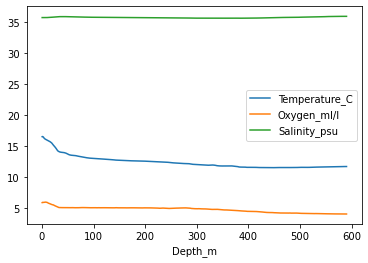

In [122]:
ctd_data.plot()

We can explicitly pass nicer labels to legend if needed:

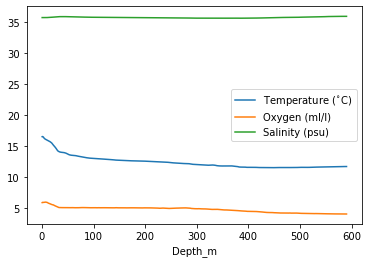

In [123]:
ax = ctd_data.plot()
ax.legend(["Temperature $\mathrm{(^{\circ}C}$)", "Oxygen (ml/l)", "Salinity (psu)"]);

Now, since the data are technically all in different units, it probably makes more sense to plot all 3 of the variables separately, with their own y axes. We can do this by passing `subplots=True` as an argument of the `plot()` method:

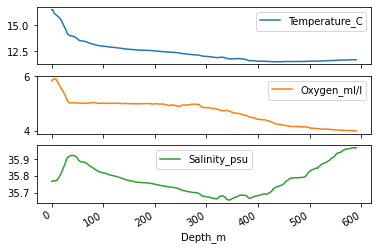

In [125]:
axes = ctd_data.plot(subplots=True)

It is easy to create other useful plots using `DataFrame`:

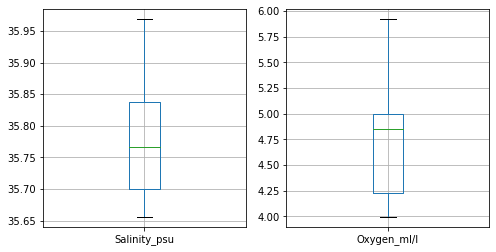

In [126]:
# Use matplotlib to initialise your figure with 2 subplots
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,4))

# Make boxplots with specific columns in each subplot
ctd_data.boxplot(ax=ax0, column=['Salinity_psu'])
ctd_data.boxplot(ax=ax1, column=['Oxygen_ml/l'])

plt.show()

More options for visualisation can be found in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

## 6. Exporting data

A very useful feature of Pandas is the ability to write and export data to a `.csv` (comma seperated value) file that can be read easily by programs like Excel:

In [80]:
ctd_data.to_csv(data_dir/'ship_ctd_short_clean.csv', index=True, header=True)

## 7. Statistics

You can print a summary of main statistics for the whole DataFrame:

In [81]:
ctd_data.describe()

,Temperature_C,Oxygen_ml/l,Salinity_psu
count,1180.000000,1180.000000,1180.000000
mean,12.349396,4.694360,35.778409
std,1.003352,0.437966,0.086346
min,11.479900,3.994650,35.655600
25%,11.589050,4.226740,35.700775
50%,12.017850,4.856475,35.766950
75%,12.691925,4.999835,35.837650
max,16.531500,5.920030,35.968900


You can still call individual statistics using `numpy`, e.g.:

In [82]:
np.mean(ctd_data)

Temperature_C    12.349396
Oxygen_ml/l       4.694360
Salinity_psu     35.778409
dtype: float64

## 8. Combining Datasets

`DataFrame` can be created manually, by grouping several `Series` together.

We will load two `Series` objects from two `.csv` files and combine them into a `DataFrame`.

Data are monthly values of:
* Southern Oscillation Index (SOI) - "a standardized index based on the observed sea level pressure differences between Tahiti and Darwin, Australia"
* Outgoing Longwave Radiation (OLR) - "a proxy for convective precipitation in the western equatorial Pacific"

Data were downloaded from [NOAA's website](https://www.ncdc.noaa.gov/teleconnections/).

In [127]:
soi_df = pd.read_csv('../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

olr_df = pd.read_csv('../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [128]:
soi_df.head()

,Value
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7


In [129]:
olr_df.head()

,Value
Date,
1974-06-01,1.1
1974-07-01,0.0
1974-08-01,1.0
1974-09-01,0.9
1974-10-01,1.1


The following code tells Pandas to combine the two DataFrames, `olr_df` and `soi_df`, into one.

In [130]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})

The above code combines the two datasets by putting all the data in the Value columns into the correct rows based on whether they have the **same index**. For example, all data in the OLR Value column occurring on the same dates as the SOI data will be in the same row.

In [131]:
df.head()

,OLR,SOI
Date,,
1951-01-01,NaN,1.5
1951-02-01,NaN,0.9
1951-03-01,NaN,-0.1
1951-04-01,NaN,-0.3
1951-05-01,NaN,-0.7


In the above output, why are there a bunch of NaN values in the OLR column?

Note that, although the data series do not overlap completely, we can combine them seamlesssly into a DataFrame because `pandas` understands datetime objects as the index.

In [132]:
df.describe()

,OLR,SOI
count,551.000000,848.000000
mean,0.006534,0.131958
std,0.968012,0.935401
min,-2.800000,-3.600000
25%,-0.600000,-0.400000
50%,0.100000,0.100000
75%,0.700000,0.800000
max,2.300000,2.900000


***
***

# Other useful Pandas Operations

## Groupby operations

Often, we want to calculate aggregated values across the values of a certain index or column. This may be very useful when you have many columns or if you have lots of qualitative data.

In the example below, we can quickly compute monthly averages across all the years in our dataframe as follows:

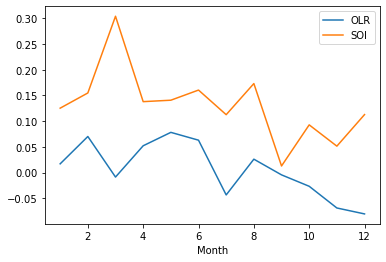

In [98]:
df_monthly_means = df.groupby(df.index.month).mean()

# Show the result on a plot
df_monthly_means.plot()
plt.xlabel('Month')
plt.show()

## Computing correlations

Both `Series` and `DataFrames` have a `corr()` method to compute the correlation coefficient.

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [83]:
ctd_data.corr()

,Temperature_C,Oxygen_ml/l,Salinity_psu
Temperature_C,1.000000,0.833816,0.225029
Oxygen_ml/l,0.833816,1.000000,-0.239306
Salinity_psu,0.225029,-0.239306,1.000000


If you want to visualise this correlation matrix, uncomment the following code cell.

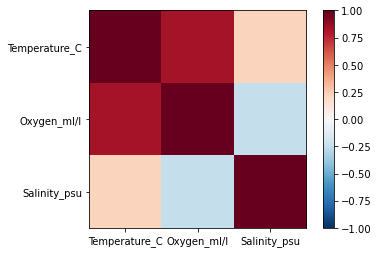

In [107]:
fig, ax = plt.subplots()
p = ax.imshow(ctd_data.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(ctd_data.corr().columns)))
ax.set_yticks(np.arange(len(ctd_data.corr().index)))
ax.set_xticklabels(ctd_data.corr().columns)
ax.set_yticklabels(ctd_data.corr().index)
fig.colorbar(p)
plt.show()

## Rolling operations

Pandas includes functionality to do [rolling means](https://en.wikipedia.org/wiki/Moving_average), sums, and more, given a specified window size. This is very useful for smoothing noisy data.

First we will create some noisy data from our dataset:

In [85]:
from numpy import random

In [86]:
noisy_data = ctd_data['Temperature_C']

# Randomise data to make it super noisy
noisy_data = noisy_data * 2*random.rand(len(noisy_data)) + noisy_data**2
print(noisy_data)

Depth_m
0.5      272.671579
1.0      291.661614
1.5      293.571950
2.0      298.344817
2.5      277.156181
            ...    
588.0    140.089273
588.5    140.584990
589.0    136.464098
589.5    149.560725
590.0    141.763840
Name: Temperature_C, Length: 1180, dtype: float64


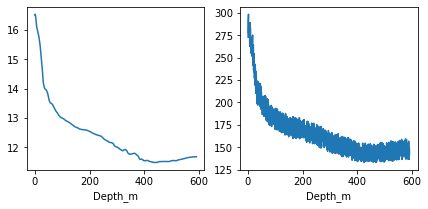

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))
ctd_data['Temperature_C'].plot(ax=ax[0])
noisy_data.plot(ax=ax[1])
plt.show()

In [88]:
noisy_roll = noisy_data.rolling(window=50)
noisy_roll

Rolling [window=50,center=False,axis=0]

In [89]:
noisy_roll.mean()

Depth_m
0.5             NaN
1.0             NaN
1.5             NaN
2.0             NaN
2.5             NaN
            ...    
588.0    147.345658
588.5    147.018515
589.0    146.664722
589.5    146.569556
590.0    146.413040
Name: Temperature_C, Length: 1180, dtype: float64

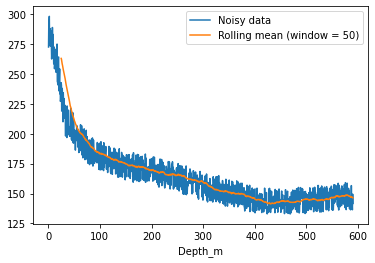

In [90]:
noisy_data.plot(label="Noisy data")
noisy_roll.mean().plot(label="Rolling mean (window = 50)")
plt.legend(loc="best")
plt.show()

There are other rolling functions, such as [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.sum.html), and you can even use the [`win_type`](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows) argument to use change the window type.

### Exercise 1

Create a new rolling object from the noisy data and apply the `win_type` argument, and explore the result. 

Two common types are `'triang'` and `'gaussian'`.

Note: for gaussian you'll have to specify a standard deviation argument (written as `std`) 
when you apply the `sum()` or `mean()` function afterwards. 

In [91]:
## your code goes here

## Ordinary Least Square (OLS) regressions

### Numpy polynomial fitting

In [99]:
from numpy.polynomial import polynomial as P

In [100]:
x = df['OLR'].values
y = df['SOI'].values

In [101]:
idx = np.isfinite(x) & np.isfinite(y)

In [102]:
coefs, stats = P.polyfit(x[idx], y[idx], 1, full=True)

In [103]:
y2 = P.polyval(x, coefs)

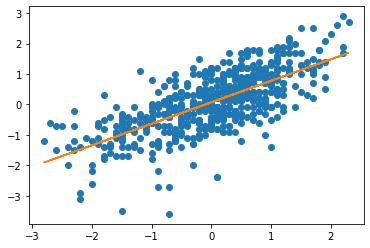

In [104]:
plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y2)
plt.show()

### Sklearn regression

In [134]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = df.dropna()
x = df['OLR'].values.reshape(-1, 1)
y = df['SOI'].values.reshape(-1, 1)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
y_pred = model.predict(x) 

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color="orange")
plt.show()

More examples: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

## Extra tutorials

Online tutorials with more in-depth operations used in pandas:

* [Kaggle tutorial](https://www.kaggle.com/learn/pandas)
* [Pandas official website Getting Started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

## References
* https://github.com/jonathanrocher/pandas_tutorial
* https://github.com/koldunovn/python_for_geosciences
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d